# 회귀 분석

- 수치형 데이터를 예측하기 위한 대표적인 지도학습 방법론
- 부동산 가격 예측, 고객 수요 예측, 원재료 가격 예측 등 수치형 예측 문제에 활용
- 과거 데이터 패턴을 학습하는 방법이므로, 변동성이 심한 문제에서는 모델 성능이 떨어질 수 있음

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 선형 회귀(Linear Regression)

- 변수들 사이의 선형적인 함수 관계를 모델링
- 데이터를 바탕으로 변수 관계를 설명하는 일차 방정식 함수를 만듦
- 학습 방법은 경사 하강법 알고리즘을 사용함
- 만약 변수들의 상관관계가 없다면 합리적인 선을 찾아내지 못 할 수 있음

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.DataFrame({'height': [160, 180, 170, 150, 175, 165, 185, 155, 140, 190],
                  'weight': [48, 75, 73, 45, 75, 55, 78, 53, 40, 85]})

<AxesSubplot:xlabel='weight', ylabel='height'>

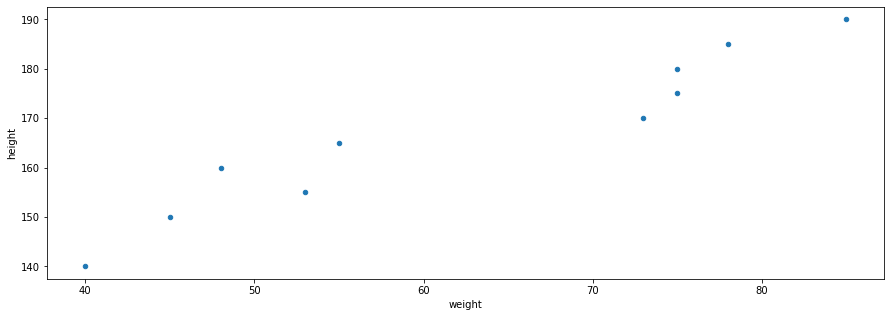

In [4]:
df.plot.scatter(x = 'weight', y = 'height', figsize = (15, 5))

In [5]:
# 선형 회귀 모델 정의 / 학습

lr_model = LinearRegression()
lr_model.fit(df['weight'], df['height'])

ValueError: Expected 2D array, got 1D array instead:
array=[48 75 73 45 75 55 78 53 40 85].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
df['weight']

0    48
1    75
2    73
3    45
4    75
5    55
6    78
7    53
8    40
9    85
Name: weight, dtype: int64

- df['weight']가 1차원이라서 모델 학습할때 오류가 발생함
- 2차원으로 바꿔줘야 함

In [7]:
df['weight'].values.reshape(-1, 1)

array([[48],
       [75],
       [73],
       [45],
       [75],
       [55],
       [78],
       [53],
       [40],
       [85]], dtype=int64)

In [8]:
# 다시 선형 회귀 모델 정의 / 학습

lr_model = LinearRegression()
lr_model.fit(df['weight'].values.reshape(-1, 1), df['height'])

LinearRegression()

In [9]:
# 기울기(W)

lr_model.coef_

array([0.95205509])

In [10]:
# y절편(b)

lr_model.intercept_

107.30614601599592

In [11]:
# 선형 회귀 선

x = np.linspace(40, 90, 50)
y = lr_model.coef_[0] * x + lr_model.intercept_     # Y = W * X + b
y

array([145.38834951, 146.3598343 , 147.33131908, 148.30280386,
       149.27428865, 150.24577343, 151.21725821, 152.188743  ,
       153.16022778, 154.13171256, 155.10319735, 156.07468213,
       157.04616691, 158.0176517 , 158.98913648, 159.96062126,
       160.93210604, 161.90359083, 162.87507561, 163.84656039,
       164.81804518, 165.78952996, 166.76101474, 167.73249953,
       168.70398431, 169.67546909, 170.64695388, 171.61843866,
       172.58992344, 173.56140823, 174.53289301, 175.50437779,
       176.47586257, 177.44734736, 178.41883214, 179.39031692,
       180.36180171, 181.33328649, 182.30477127, 183.27625606,
       184.24774084, 185.21922562, 186.19071041, 187.16219519,
       188.13367997, 189.10516476, 190.07664954, 191.04813432,
       192.0196191 , 192.99110389])

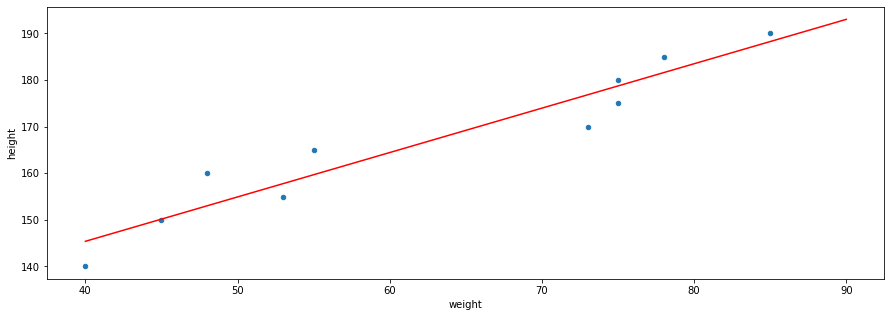

In [12]:
# 선형 회귀 선 시각화

df.plot.scatter(x = 'weight', y = 'height', figsize = (15, 5))
plt.plot(x, y, c = 'red')
plt.show()

## 다중 선형 회귀(multi-linear regression)

- 변수(X)가 여러 개인 회귀 분석
- 일반적으로 선형 회귀 분석에서는 자동적으로 단위에 맞는 함수를 찾아주기 때문에 정규화/표준화 과정이 필요 없음

In [13]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

cal_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price($)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [14]:
# 학습/테스트 데이터 세트 분할

from sklearn.model_selection import train_test_split

X = cal_house_df.drop('Price($)', axis = 1)
y = cal_house_df['Price($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, shuffle = True)

In [15]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17149,4.6908,35.0,5.728643,0.969849,486.0,2.442211,37.44,-122.21
6795,2.7036,24.0,3.856867,1.061896,2909.0,2.813346,34.08,-118.14
12679,4.6944,26.0,5.375439,0.926316,781.0,2.740351,38.55,-121.38
19857,1.6645,20.0,5.671815,1.169884,1031.0,3.980695,36.35,-119.42
17895,3.5625,27.0,4.055138,1.042607,2230.0,2.794486,37.36,-121.95
...,...,...,...,...,...,...,...,...
8323,2.2031,27.0,4.412935,1.104478,1622.0,4.034826,33.95,-118.30
92,0.7500,52.0,2.823529,0.911765,191.0,5.617647,37.80,-122.28
4516,2.3716,52.0,3.941573,1.015730,1849.0,4.155056,34.03,-118.20
8199,3.4833,23.0,4.259934,1.139073,1478.0,2.447020,33.79,-118.14


In [16]:
y_train

17149    500001.0
6795     170000.0
12679    130900.0
19857     48000.0
17895    208600.0
           ...   
8323      96900.0
92       162500.0
4516     122800.0
8199     209400.0
8939     398300.0
Name: Price($), Length: 20433, dtype: float64

In [17]:
# 다중선형회귀 모델 정의 / 학습

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# 예측

predictions = mlr_model.predict(X_test)
predictions

array([279459.45362932, 186830.36424198, 469502.49209548, 148730.79636517,
       283674.75003211, 157379.14574265, 138108.83616063,  84826.00292872,
       277333.94650912, 265783.07962534, 239551.9277746 , 210273.17852466,
       253759.81690441, 107174.0109274 , 241928.5866864 ,  68373.94684723,
       221449.60562612,  40551.73930665, 157231.34297608, 300031.19503404,
       281507.9287074 , 306961.02587997, 118301.11925504, 154681.66474609,
       215877.15664126, 246769.45645136, 326873.49565179,  28009.20386096,
       326815.91347015, 399237.31215424, 140298.63112109, 268996.21792039,
       188438.65882252, 188887.57174998, 142473.57746302, 103549.7563482 ,
       250724.16608412, 137652.64153768, 306853.54001221, 137870.94771246,
       188766.00914664, 238312.27540452, 218288.28689852, 175718.66708806,
       309838.67828271, 219501.64930803, 198661.59221623,  60832.8862427 ,
       253146.1124517 , 164964.15546533, 191502.73463693, 121097.12630412,
        83925.6461224 , 1

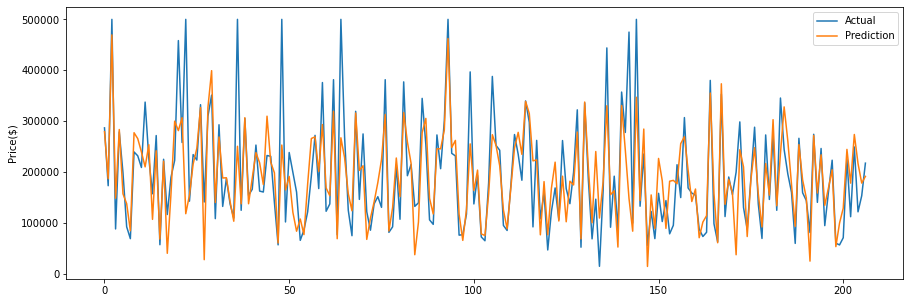

In [19]:
# 예측 결과 시각화

y_test = y_test.reset_index(drop = True)

plt.figure(figsize = (15, 5))
plt.plot(y_test, label = 'Actual')
plt.plot(predictions, label = 'Prediction')
plt.legend(loc = 'upper right')
plt.ylabel('Price($)')
plt.show()